In [47]:
from __future__ import division
import numpy as np
import floquet as fl
from matplotlib import pylab as plt
import sigma as si
import fourier as fou
import aes as aes
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

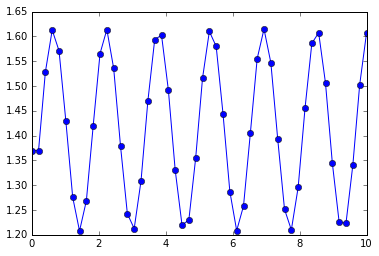

In [70]:
w = 1
V = w**2
c_1 = 0.5
c_0 = 0
g = .1
T = 20
ca1, cq1 = w**2-g**2/4+c_0-2*g, -.5*c_1
ca2, cq2 = w**2-g**2/4-c_0-2*g, .5*c_1
i = 3
t = np.linspace(0,10, 50)
wc = 50
c = c_0+c_1*np.cos(2*t)
T1, T2 = 0, 0
x1x1, x2x2, x1x2, x1p1, x2p2, x1p2, x2p1, p1p1, p2p2, p1p2 = aes.cov(t, g, ca1, cq1, ca2, cq2, T1, T2, wc, i, unpacked = True)
plt.plot(t, p2p2, 'o-')

#Mcov = aes.cov(t, g, ca1, cq1, ca2, cq2, T1, T2, wc, i)
#heat1, heat2 = aes.heat(t, Mcov, c, V)
#plt.plot(t, heat1, 'bo', t, heat2, 'ro')

#temps = np.arange(0, 350, 10)
#heat = np.array([])
#for T in temps:
#    print T
#    T1, T2 = 0, T
#    x1x1, x2x2, x1x2, x1p1, x2p2, x1p2, x2p1, p1p1, p2p2, p1p2 = aes.cov(t, g, ca1, cq1, ca2, cq2, T1, T2, wc, i, unpacked = True)
#    heat = np.append(heat, c_0*np.average(x2p1))
#plt.plot(temps, heat, 'o')    

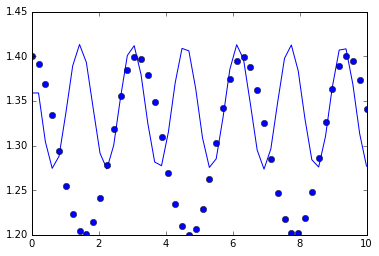

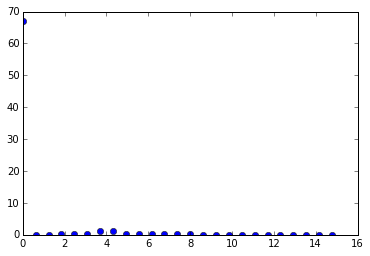

[1, 5, 0, 10]

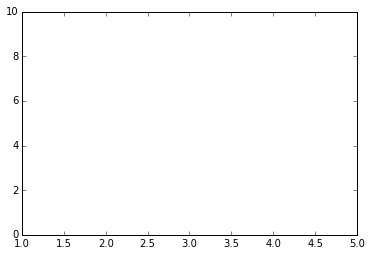

In [79]:
plt.plot(t, x1x1, 'b', t, 1.3+0.1*np.cos(2*t), 'o')
plt.figure()
fou.plot_ft(t, x1x1)
plt.axis([1, 5, 0, 10])

180 124.18826503
180

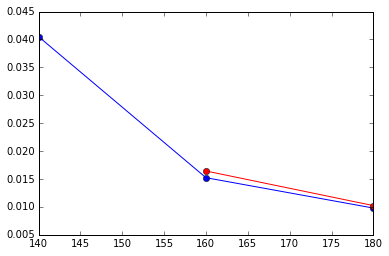

In [38]:
w = 1
V = w**2
c_1 = .5
c_0 = 0
g = .001
T = 0
ca1, cq1 = w**2-g**2/4+c_0-2*g, -.5*c_1
ca2, cq2 = w**2-g**2/4-c_0-2*g, .5*c_1
i = 3
t = np.linspace(0,2.5, 10)
wc = 50
c = c_0+c_1*np.cos(2*t)
temps = np.arange(0, 200, 20)
neg_v = np.array([])
for T in temps:
    Mcov = aes.cov(t, g, ca1, cq1, ca2, cq2, T, T+5, wc, i)
    neg = aes.discordia(t, Mcov)
    neg_v = np.append(neg_v, np.average(neg))
    print '\r', T, 
plt.plot(temps, neg_v, 'o-b')
print np.abs(np.imag(fl.mathieu_nu(ca1, cq1)))/g
neg_v = np.array([])
for T in temps:
    Mcov = aes.cov(t, g, ca1, cq1, ca2, cq2, T, T, wc, i)
    neg = aes.discordia(t, Mcov)
    neg_v = np.append(neg_v, np.average(neg))
    print '\r', T, 
plt.plot(temps, neg_v, 'o-r')

In [33]:
neg_v

array([        nan,  3.52899172,  2.59939973,  2.04058894,  1.63917151,
        1.32559749,  1.06821038,  0.84989059,  0.66032151,  0.49280183])

In [3]:
w = 1
V = w**2
c_1 = 0
c_0 = 0
g = .001
ca1, cq1 = w**2-g**2/4+c_0-2*g, -.5*c_1
ca2, cq2 = w**2-g**2/4-c_0-2*g, .5*c_1
nu1, nu2 = fl.mathieu_nu(ca1, cq1), fl.mathieu_nu(ca2, cq2)
#A1, A2 = fl.mathieu_coefs(ca1, cq1, nu1), fl.mathieu_coefs(ca2, cq2, nu2)
i = 1
#A1, A2 = A1[A1.size//2-i:A1.size//2+i+1], A2[A2.size//2-i:A2.size//2+i+1]
t = np.linspace(0,2, 30)
#
#
wc = 50
T = 0
T1, T2 = T, T
#
#

covarianzas = aes.cov(t, g, ca1, cq1, ca2, cq2, T1, T2, wc, i)

In [9]:
def nmenos(Mcov):
        alpha = Mcov[:2, :2]
        beta = Mcov[2:, 2:]
        gamma = Mcov[:2, 2:] 
        
        A = np.linalg.det(alpha)
        B = np.linalg.det(beta)
        C = np.linalg.det(gamma)
        D = np.linalg.det(Mcov[:, :])
        
        delta = A+B+2*C
        
        nmenos = np.sqrt((delta-np.sqrt(delta**2-4*D))/2)
        return nmenos

In [10]:
M = covarianzas[:, :, 2]
print nmenos(M)

nan


In [11]:
M

array([[  5.00341278e-01,   5.77668054e-09,   0.00000000e+00,
          0.00000000e+00],
       [  5.77668054e-09,   5.00585936e-01,   0.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.00341278e-01,
          5.77668054e-09],
       [  0.00000000e+00,   0.00000000e+00,   5.77668054e-09,
          5.00585936e-01]])